In [129]:
# Read location_variables.txt and extract file paths
location_file = "location_variables.txt"

# Read the file and store variables in a dictionary
with open(location_file, "r") as file:
    locations = {line.split(" = ")[0]: line.split(" = ")[1].strip().strip('"') for line in file}

# Extract relevant paths
preprocessed_path = locations["preprocessed_path"]  # Latest input data path
result_path = locations["result_path"]  # Where to save preprocessed data

print("Using Data Path:", preprocessed_path)
print("Saving Preprocessed Data To:", result_path)


Using Data Path: ./PRE_PROCESSED_DATA/04. April 2025/04_04_2025 preprocessed data/2025_04_04_09_04_20 preprocessed data/
Saving Preprocessed Data To: ./RESULTS/04. April 2025/04_04_2025 results/2025_04_04_


In [130]:
# Step 2: Define Required Columns & Load Data
import pandas as pd
import os
required_columns = {
    "actual_production.csv": ["plant_sk", "plant_code", "material_sk", "material_code", "Production_HL"],
    "completed_production.csv" : ["duration","end_outflow_ts","material_sk","material_code","plant_sk","plant_code","product_unit","quantity","start_inflow_ts","status","PC_HL_Conversion","quantity_HL"],
    "inbound_loads.csv" : ["RFRC_NUM12","load_id","movement_type","transportation_planning_priority","origin","destination","destination_slot_arrival","destination_slot_departure"],
    "inventory_policy.csv" : ["plant_sk","material_sk","plant_code","material_code","target_opening_stock","maximum_stock"],
    "lcp_data.csv" : ["material_sk","lcp_rank","material_code","origin_location_code","destination_location_code","release_week_id","ins_gmt_ts"],
    "load_details.csv" : ["RFRC_NUM12","load_id","movement_type","transportation_planning_priority","origin","destination","origin_slot_arrival","origin_slot_departure","destination_slot_arrival","destination_slot_departure","material_sk","material_code","total_quantity_HL","total_quantity_PAL","total_quantity_KG"],
    "obs_df.csv" : ["material_code","plant_code","material_sk","plant_sk","Stock_At_Risk_hl"],
    "open_so.csv" : ["origin_slot_arrival","plant_code","material_sk","material_code","unit_of_measure_code","PC_HL_Conversion","open_so_out(HL)"],
    "open_sto.csv" : ["RFRC_NUM12","load_id","movement_type","transportation_planning_priority","origin","destination","origin_slot_arrival","origin_slot_departure","destination_slot_arrival","destination_slot_departure","material_sk","material_code","plant_code","unit_of_measure_code","PC_HL_Conversion","total_quantity_HL","PC_PAL_Conversion","pal_weight_kg","total_quantity_PAL","total_quantity_KG"],
    "outbound_loads.csv" : ["RFRC_NUM12","load_id","movement_type","transportation_planning_priority","origin","destination","origin_slot_arrival","origin_slot_departure"],
    "planned_loads.csv" : ["RFRC_NUM12","load_id","movement_type","transportation_planning_priority","origin","destination","origin_slot_arrival","origin_slot_departure","destination_slot_arrival","destination_slot_departure","material_sk","material_code","plant_code","unit_of_measure_code","PC_HL_Conversion","total_quantity_HL"],
    "planned_production.csv" : ["duration","end_outflow_ts","material_sk","material_code","plant_sk","plant_code","product_unit","quantity","start_inflow_ts","status","PC_HL_Conversion","quantity_HL"],
    "stock.csv" : ["material_code","material_sk","plant_sk","plant_code","Opening_Stock_hl"],
    "uom_df.csv" : ["material_code","material_sk","target_unit_of_measure_code","conversion_numerator","conversion_denumerator","pal_weight_kg","PC_HL_Conversion"],
    "uom_full.csv" : ["material_code","material_sk","target_unit_of_measure_code","conversion_numerator","conversion_denumerator"],
    "uom_weight.csv" : ["material_code","pal_weight_kg"]

}

# Load datasets
dataframes = {}
for file, columns in required_columns.items():
    file_path = os.path.join(preprocessed_path, file)
    
    if os.path.exists(file_path):
        dataframes[file] = pd.read_csv(file_path, usecols=columns, dtype=str, low_memory=False)
        print(f"Loaded {file} - Shape: {dataframes[file].shape}")
    else:
        print(f"Warning: {file} not found!")

# Display sample output
for file, df in dataframes.items():
    print(f"\n{file} - First 3 rows:")
    display(df.head(3))


Loaded actual_production.csv - Shape: (0, 5)
Loaded completed_production.csv - Shape: (29, 12)
Loaded inbound_loads.csv - Shape: (81, 8)
Loaded inventory_policy.csv - Shape: (4999, 6)
Loaded lcp_data.csv - Shape: (57093, 7)
Loaded load_details.csv - Shape: (81, 15)
Loaded obs_df.csv - Shape: (9686, 5)
Loaded open_so.csv - Shape: (1264, 7)
Loaded open_sto.csv - Shape: (81, 20)
Loaded outbound_loads.csv - Shape: (81, 8)
Loaded planned_loads.csv - Shape: (81, 16)
Loaded planned_production.csv - Shape: (55, 12)
Loaded stock.csv - Shape: (10560, 5)
Loaded uom_df.csv - Shape: (25241, 7)
Loaded uom_full.csv - Shape: (126615, 5)
Loaded uom_weight.csv - Shape: (12674, 2)

actual_production.csv - First 3 rows:


,plant_sk,plant_code,material_sk,material_code,Production_HL



completed_production.csv - First 3 rows:


,duration,end_outflow_ts,material_sk,material_code,plant_sk,plant_code,product_unit,quantity,start_inflow_ts,status,PC_HL_Conversion,quantity_HL
0,226.0,2025-04-04 04:03:00,1894119,101564.0,1810,GB02,PCE,8334.0,2025-04-04 00:17:00,processorder,22.22222222222222,185200.0
1,300.0,2025-04-04 05:20:00,1909473,106168.0,2566,DE02,PCE,6000.0,2025-04-04 00:20:00,processorder,16.666666666666668,100000.0
2,181.0,2025-04-04 05:27:00,27817,47305.0,4766,DE06,PCE,2500.0,2025-04-04 02:26:00,processorder,8.333333333333334,20833.333333333336



inbound_loads.csv - First 3 rows:


,RFRC_NUM12,load_id,movement_type,transportation_planning_priority,origin,destination,destination_slot_arrival,destination_slot_departure
0,4508584423.0,34701686,STO,12,GB80,GB28,2025-04-05 06:00:00,2025-04-05 07:00:00
1,4508584424.0,34701560,STO,12,GB80,GB28,2025-04-05 06:00:00,2025-04-05 07:00:00
2,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 20:00:00,2025-04-04 20:30:00



inventory_policy.csv - First 3 rows:


,plant_sk,material_sk,plant_code,material_code,target_opening_stock,maximum_stock
0,2566,3769,DE02,11524,4.45844,13.81726
1,2566,3480,DE02,6365,46.016177,302.186702
2,1090,70639,BE05,81838,0.0,0.1167



lcp_data.csv - First 3 rows:


,material_sk,lcp_rank,material_code,origin_location_code,destination_location_code,release_week_id,ins_gmt_ts
0,685,1,3393,BE02,BE03,202451,20241227124946
1,685,1,3393,BE02,BE03,202505,20250131042713
2,685,1,3393,BE02,BE03,202506,20250204042546



load_details.csv - First 3 rows:


,RFRC_NUM12,load_id,movement_type,transportation_planning_priority,origin,destination,origin_slot_arrival,origin_slot_departure,destination_slot_arrival,destination_slot_departure,material_sk,material_code,total_quantity_HL,total_quantity_PAL,total_quantity_KG
0,4508584423.0,34701686,STO,12,GB80,GB28,2025-04-04 16:00:00,2025-04-04 17:00:00,2025-04-05 06:00:00,2025-04-05 07:00:00,60836,75578,672.0,2016.0,800352.0
1,4508584424.0,34701560,STO,12,GB80,GB28,2025-04-04 15:00:00,2025-04-04 16:00:00,2025-04-05 06:00:00,2025-04-05 07:00:00,1884472,103189,1920.0,6912.0,3594240.0
2,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 16:00:00,2025-04-04 16:30:00,2025-04-04 20:00:00,2025-04-04 20:30:00,48299,94590,26.666666666666668,64.0,22835.2



obs_df.csv - First 3 rows:


,material_code,plant_code,material_sk,plant_sk,Stock_At_Risk_hl
0,3337,BE03,1286,73,684.288
1,3337,BE04,1286,142,874.368
2,3337,BE05,1286,1090,34.6896



open_so.csv - First 3 rows:


,origin_slot_arrival,plant_code,material_sk,material_code,unit_of_measure_code,PC_HL_Conversion,open_so_out(HL)
0,2025-04-04 00:00:00,GB01,25894,70909,PC,25.252525252525253,3787.878787878788
1,2025-04-04 00:00:00,GB01,30200,70911,PC,12.626262626262626,6060.606060606061
2,2025-04-04 00:00:00,GB01,35600,82765,PC,9.469696969696969,9469.696969696968



open_sto.csv - First 3 rows:


,RFRC_NUM12,load_id,movement_type,transportation_planning_priority,origin,destination,origin_slot_arrival,origin_slot_departure,destination_slot_arrival,destination_slot_departure,material_sk,material_code,plant_code,unit_of_measure_code,PC_HL_Conversion,total_quantity_HL,PC_PAL_Conversion,pal_weight_kg,total_quantity_PAL,total_quantity_KG
0,4508584423.0,34701686,STO,12,GB80,GB28,2025-04-04 16:00:00,2025-04-04 17:00:00,2025-04-05 06:00:00,2025-04-05 07:00:00,60836,75578,GB80,PC,2.0,672.0,6.0,397.0,2016.0,800352.0
1,4508584424.0,34701560,STO,12,GB80,GB28,2025-04-04 15:00:00,2025-04-04 16:00:00,2025-04-05 06:00:00,2025-04-05 07:00:00,1884472,103189,GB80,PC,3.3333333333333335,1920.0,12.0,520.0,6912.0,3594240.0
2,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 16:00:00,2025-04-04 16:30:00,2025-04-04 20:00:00,2025-04-04 20:30:00,48299,94590,GB01,PC,3.3333333333333335,26.666666666666668,8.0,356.8,64.0,22835.2



outbound_loads.csv - First 3 rows:


,RFRC_NUM12,load_id,movement_type,transportation_planning_priority,origin,destination,origin_slot_arrival,origin_slot_departure
0,4508584423.0,34701686,STO,12,GB80,GB28,2025-04-04 16:00:00,2025-04-04 17:00:00
1,4508584424.0,34701560,STO,12,GB80,GB28,2025-04-04 15:00:00,2025-04-04 16:00:00
2,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 16:00:00,2025-04-04 16:30:00



planned_loads.csv - First 3 rows:


,RFRC_NUM12,load_id,movement_type,transportation_planning_priority,origin,destination,origin_slot_arrival,origin_slot_departure,destination_slot_arrival,destination_slot_departure,material_sk,material_code,plant_code,unit_of_measure_code,PC_HL_Conversion,total_quantity_HL
0,4508584423.0,34701686,STO,12,GB80,GB28,2025-04-04 16:00:00,2025-04-04 17:00:00,2025-04-05 06:00:00,2025-04-05 07:00:00,60836,75578,GB80,PC,2.0,672.0
1,4508584424.0,34701560,STO,12,GB80,GB28,2025-04-04 15:00:00,2025-04-04 16:00:00,2025-04-05 06:00:00,2025-04-05 07:00:00,1884472,103189,GB80,PC,3.3333333333333335,1920.0
2,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 16:00:00,2025-04-04 16:30:00,2025-04-04 20:00:00,2025-04-04 20:30:00,48299,94590,GB01,PC,3.3333333333333335,26.666666666666668



planned_production.csv - First 3 rows:


,duration,end_outflow_ts,material_sk,material_code,plant_sk,plant_code,product_unit,quantity,start_inflow_ts,status,PC_HL_Conversion,quantity_HL
0,411.0,2025-04-04 13:00:00,26576,45196.0,142,BE04,PCE,5531.375,2025-04-04 06:09:00,unlocked,12.626262626262626,69840.59343434343
1,1003.0,2025-04-04 23:27:00,1895259,106428.0,1810,GB02,PCE,22007.0,2025-04-04 06:44:00,processorder,7.335680751173709,161436.3262910798
2,550.0,2025-04-04 16:14:00,1867379,103950.0,73,BE03,PCE,3165.0,2025-04-04 07:04:00,NO STATUS,5.0,15825.0



stock.csv - First 3 rows:


,material_code,material_sk,plant_sk,plant_code,Opening_Stock_hl
0,3337,1286,50,BE50,201.3264
1,3337,1286,73,BE03,684.288
2,3337,1286,119,BE10,64.8648



uom_df.csv - First 3 rows:


,material_code,material_sk,target_unit_of_measure_code,conversion_numerator,conversion_denumerator,pal_weight_kg,PC_HL_Conversion
0,73.0,128.0,HL,5.0,1.0,545.0,5.0
1,73.0,128.0,PAL,20.0,1.0,545.0,20.0
2,3428.0,514.0,PAL,60.0,1.0,985.0,60.0



uom_full.csv - First 3 rows:


,material_code,material_sk,target_unit_of_measure_code,conversion_numerator,conversion_denumerator
0,185.0,92,PAL,70.0,1.0
1,80.0,10,PAL,8.0,1.0
2,26.0,6,PAL,70.0,1.0



uom_weight.csv - First 3 rows:


,material_code,pal_weight_kg
0,100298,1005.76
1,100584,936.0
2,100787,928.0


In [131]:
# Define individual DataFrames from the loaded dictionary
df_stock = dataframes['stock.csv'][['plant_code', 'material_sk', 'Opening_Stock_hl']].copy()
df_stock.rename(columns={'Opening_Stock_hl': 'stock_at_hand'}, inplace=True)

df_outgoing_so = dataframes['open_so.csv'][['plant_code', 'material_sk', 'open_so_out(HL)']].copy()
df_outgoing_so.rename(columns={'open_so_out(HL)': 'outgoing_so'}, inplace=True)

df_incoming_sto = dataframes['open_sto.csv'][['destination', 'material_sk', 'total_quantity_HL']].copy()
df_incoming_sto.rename(columns={'destination': 'plant_code', 'total_quantity_HL': 'incoming_sto'}, inplace=True)

df_outgoing_sto = dataframes['open_sto.csv'][['origin', 'material_sk', 'total_quantity_HL']].copy()
df_outgoing_sto.rename(columns={'origin': 'plant_code', 'total_quantity_HL': 'outgoing_sto'}, inplace=True)

df_planned_production = dataframes['planned_production.csv'][['plant_code', 'material_sk', 'product_unit', 'quantity']].copy()
df_planned_production = df_planned_production[df_planned_production['product_unit'] == 'PCE']
df_planned_production = df_planned_production.groupby(['plant_code', 'material_sk'], as_index=False)['quantity'].sum()
df_planned_production.rename(columns={'quantity': 'planned_production'}, inplace=True)

df_actual_production = dataframes['actual_production.csv'][['plant_code', 'material_sk', 'Production_HL']].copy()
df_actual_production.rename(columns={'Production_HL': 'actual_prod'}, inplace=True)

df_inventory_policy = dataframes['inventory_policy.csv'][['plant_code', 'material_sk', 'target_opening_stock']].copy()
df_inventory_policy.rename(columns={'target_opening_stock': 'safety_stock'}, inplace=True)


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_planned_loads = pd.read_csv(r"C:\Users\40108805\Downloads\queries\Input_Data\04. April 2025\03_04_2025\2025_04_03_16_44_15 input data\input_Planned_loads.csv", parse_dates=["origin_slot_arrival"])

# Ensure datetime format is correct
df_planned_loads["origin_slot_arrival"] = pd.to_datetime(df_planned_loads["origin_slot_arrival"])

# Count unique loads per day
daily_loads = df_planned_loads.groupby(df_planned_loads["origin_slot_arrival"].dt.date)["load_id"].nunique()
print(daily_loads)

# # Plot the daily load trend
# plt.figure(figsize=(12, 6))
# sns.lineplot(x=daily_loads.index, y=daily_loads.values, marker="o", linestyle="-", color="b")
# plt.xticks(rotation=45)
# plt.xlabel("Date")
# plt.ylabel("Number of Unique Loads")
# plt.title("Daily Unique Load Count Trend")
# plt.grid(True)
# plt.show()


origin_slot_arrival
2025-04-03    180
2025-04-04     80
Name: load_id, dtype: int64


In [133]:
# Count unique loads per plant per day
daily_loads_per_plant = df_planned_loads.groupby([df_planned_loads["origin_slot_arrival"].dt.date, "plant_code"])["load_id"].nunique()

# Convert to DataFrame for better visualization
daily_loads_per_plant = daily_loads_per_plant.reset_index().rename(columns={"origin_slot_arrival": "date", "load_id": "unique_loads"})

# Pivot for a heatmap visualization
pivot_table = daily_loads_per_plant.pivot(index="date", columns="plant_code", values="unique_loads").fillna(0)
print(pivot_table)

# Plot a heatmap
# plt.figure(figsize=(12, 6))
# sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
# plt.xlabel("Plant Code")
# plt.ylabel("Date")
# plt.title("Unique Load Count Per Plant Per Day")
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.show()


plant_code  GB01  GB02  GB28  GB67
date                              
2025-04-03    74    68    36     2
2025-04-04    36    31    13     0


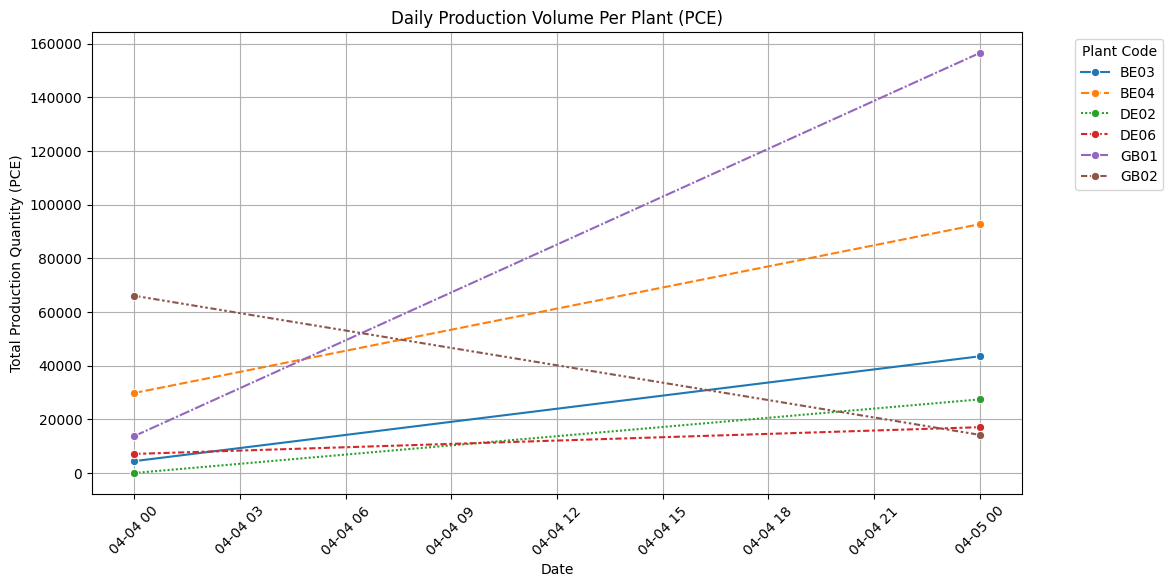

In [156]:
# Load the dataset
df_production = pd.read_csv(r"C:\Users\40108805\Downloads\queries\PRE_PROCESSED_DATA\04. April 2025\04_04_2025 preprocessed data\2025_04_04_09_04_20 preprocessed data\planned_production.csv", parse_dates=["end_outflow_ts"])

# Ensure datetime format is correct
df_production["end_outflow_ts"] = pd.to_datetime(df_production["end_outflow_ts"])

# Filter only rows where product_unit is 'PCE'
df_production = df_production[df_production["product_unit"] == "PCE"]

# Aggregate production quantity per plant per day
daily_production_per_plant = df_production.groupby([df_production["end_outflow_ts"].dt.date, "plant_code"])["quantity"].sum()

# Convert to DataFrame for visualization
daily_production_per_plant = daily_production_per_plant.reset_index().rename(columns={"end_outflow_ts": "date", "quantity": "total_production"})

# Pivot table for visualization
pivot_production = daily_production_per_plant.pivot(index="date", columns="plant_code", values="total_production").fillna(0)

# Plot production trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_production, marker="o")
plt.xlabel("Date")
plt.ylabel("Total Production Quantity (PCE)")
plt.title("Daily Production Volume Per Plant (PCE)")
plt.legend(title="Plant Code", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [157]:
# Disable scientific notation for better readability
pd.set_option("display.float_format", "{:,.0f}".format)

# Calculate total PCE production per day (all plants combined)
total_pce_production_per_day = df_production.groupby(df_production["end_outflow_ts"].dt.date)["quantity"].sum()

# Display the result in a readable format
print(total_pce_production_per_day)


end_outflow_ts
2025-04-04   121,112
2025-04-05   351,370
Name: quantity, dtype: float64


In [136]:
# Step 1: Merge all the data sources step-by-step
df_stock_available = df_stock.merge(df_outgoing_so, on=['plant_code', 'material_sk'], how='left') \
    .merge(df_incoming_sto, on=['plant_code', 'material_sk'], how='left') \
    .merge(df_planned_production, on=['plant_code', 'material_sk'], how='left') \
    .merge(df_actual_production, on=['plant_code', 'material_sk'], how='left') \
    .merge(df_outgoing_sto, on=['plant_code', 'material_sk'], how='left') \
    .merge(df_inventory_policy, on=['plant_code', 'material_sk'], how='left')

# Step 2: Define the columns involved in stock computation
quantity_cols = [
    'stock_at_hand',
    'outgoing_so',
    'incoming_sto',
    'planned_production',
    'actual_prod',
    'outgoing_sto',
    'safety_stock'
]

# Step 3: Convert all quantity columns to numeric (in case some are strings)
for col in quantity_cols:
    df_stock_available[col] = pd.to_numeric(df_stock_available[col], errors='coerce')

# Step 4: Replace NaNs with 0 for computation
df_stock_available[quantity_cols] = df_stock_available[quantity_cols].fillna(0)

# Step 5: Calculate stock available
df_stock_available['stock_available'] = (
    df_stock_available['stock_at_hand']
    - df_stock_available['outgoing_so']
    + df_stock_available['incoming_sto']
    + df_stock_available['planned_production']
    + df_stock_available['actual_prod']
    - df_stock_available['outgoing_sto']
    - df_stock_available['safety_stock']
)

# Step 6: View the result
df_stock_available[['plant_code', 'material_sk', 'stock_available']].head()


,plant_code,material_sk,stock_available
0,BE50,1286,201
1,BE03,1286,418
2,BE10,1286,51
3,BE06,1286,9
4,BE04,1286,358


In [137]:
import pandas as pd

# Step 1: Aggregate planned quantity for each material SKU
df_required_stock = df_planned_loads.groupby(['plant_code', 'material_sk'])['actual_quantity'].sum().reset_index()
df_required_stock.rename(columns={'actual_quantity': 'required_stock'}, inplace=True)

# Ensure data types match before merging
df_required_stock['plant_code'] = df_required_stock['plant_code'].astype(str)
df_required_stock['material_sk'] = df_required_stock['material_sk'].astype(str)
df_stock_available['plant_code'] = df_stock_available['plant_code'].astype(str)
df_stock_available['material_sk'] = df_stock_available['material_sk'].astype(str)

# Step 2: Merge with stock availability
df_load_risk = df_required_stock.merge(df_stock_available, on=['plant_code', 'material_sk'], how='left')

# Step 3: Identify loads at risk
df_load_risk['load_at_risk'] = df_load_risk['stock_available'] < df_load_risk['required_stock']

# Step 4: Filter only loads at risk
df_load_risk_filtered = df_load_risk[df_load_risk['load_at_risk']]

# Step 5: Select required columns
df_load_risk_filtered = df_load_risk_filtered[['plant_code', 'material_sk', 'stock_available', 'required_stock', 'load_at_risk']]

# Display results
df_load_risk_filtered.head()


,plant_code,material_sk,stock_available,required_stock,load_at_risk
3,GB01,7264,-89,12,True
11,GB01,19508,-110,96,True
13,GB01,25894,"-1,205","3,150",True
14,GB01,25894,"-1,205","3,150",True
15,GB01,25894,"-1,205","3,150",True


In [138]:
# Check if stock_available has negative values BEFORE merging
negative_stock = df_stock_available[df_stock_available['stock_available'] < 0]
print(negative_stock)


     plant_code material_sk  stock_at_hand  outgoing_so  incoming_sto  \
10         NL03        1286             52            0             0   
18         BE12        1286              3            0             0   
21         FR11        1286             40            0             0   
39         BE12        1527              0            0             0   
55         NL13        1219            104            0             0   
...         ...         ...            ...          ...           ...   
6794       DE11     1869520             48            0             0   
6803       BE50     1868373            665            0             0   
6812       GB01     1868723             11        1,818             0   
6813       BE50     1869263            432            0             0   
6821       BE02     1875429             64            0             0   

      planned_production  actual_prod  outgoing_sto  safety_stock  \
10                     0            0             0   

In [139]:
df_stock_available['calculated_stock'] = (
    df_stock_available['stock_at_hand']
    + df_stock_available['incoming_sto']
    + df_stock_available['planned_production']
    - (df_stock_available['outgoing_so'] + df_stock_available['outgoing_sto'] + df_stock_available['safety_stock'])
)

# Compare the calculated stock with the actual stock_available column
df_stock_available[['stock_available', 'calculated_stock']].head(20)


,stock_available,calculated_stock
0,201,201
1,418,418
2,51,51
3,9,9
4,358,358
5,1,1
6,30,30
7,3,3
8,27,27
9,16,16


In [140]:
df_stock_available['stock_available'] = (
    df_stock_available['stock_at_hand']
    + df_stock_available['incoming_sto']
    + df_stock_available['planned_production']
    - (df_stock_available['outgoing_so'] + df_stock_available['outgoing_sto'] + df_stock_available['safety_stock'])
)


In [141]:
# Merge with planned loads and check load_at_risk again
df_load_risk = df_required_stock.merge(df_stock_available, on=['plant_code', 'material_sk'], how='left')
df_load_risk['load_at_risk'] = df_load_risk['stock_available'] < df_load_risk['required_stock']

# Display corrected results
df_load_risk_filtered = df_load_risk[df_load_risk['load_at_risk']]
df_load_risk_filtered[['plant_code', 'material_sk', 'stock_available', 'required_stock', 'load_at_risk']].head()


,plant_code,material_sk,stock_available,required_stock,load_at_risk
3,GB01,7264,-89,12,True
11,GB01,19508,-110,96,True
13,GB01,25894,"-1,205","3,150",True
14,GB01,25894,"-1,205","3,150",True
15,GB01,25894,"-1,205","3,150",True


In [142]:
df_stock_available['calculated_stock'] = (
    df_stock_available['stock_at_hand']
    + df_stock_available['incoming_sto']
    + df_stock_available['planned_production']
    - (df_stock_available['outgoing_so'] + df_stock_available['outgoing_sto'] + df_stock_available['safety_stock'])
)

# Compare calculated vs actual stock_available
df_stock_available[['plant_code', 'material_sk', 'stock_available', 'calculated_stock']].head(20)


,plant_code,material_sk,stock_available,calculated_stock
0,BE50,1286,201,201
1,BE03,1286,418,418
2,BE10,1286,51,51
3,BE06,1286,9,9
4,BE04,1286,358,358
5,NL15,1286,1,1
6,BE05,1286,30,30
7,NL17,1286,3,3
8,BE11,1286,27,27
9,BE09,1286,16,16


In [143]:
df_stock_available['stock_available'] = (
    df_stock_available['stock_at_hand']
    + df_stock_available['incoming_sto']
    + df_stock_available['planned_production']
    - (df_stock_available['outgoing_so'] + df_stock_available['outgoing_sto'] + df_stock_available['safety_stock'])
)


In [144]:
df_stock_available['stock_available'] = df_stock_available['stock_available'].clip(lower=0)


In [145]:
import pandas as pd

# Step 1: Aggregate planned quantity for each material SKU
df_required_stock = df_planned_loads.groupby(['plant_code', 'material_sk'])['actual_quantity'].sum().reset_index()
df_required_stock.rename(columns={'actual_quantity': 'required_stock'}, inplace=True)

# Ensure data types match before merging
df_required_stock['plant_code'] = df_required_stock['plant_code'].astype(str)
df_required_stock['material_sk'] = df_required_stock['material_sk'].astype(str)
df_stock_available['plant_code'] = df_stock_available['plant_code'].astype(str)
df_stock_available['material_sk'] = df_stock_available['material_sk'].astype(str)

# Step 2: Merge with stock availability
df_load_risk = df_required_stock.merge(df_stock_available, on=['plant_code', 'material_sk'], how='left')

# Step 3: Identify loads at risk
df_load_risk['load_at_risk'] = df_load_risk['stock_available'] < df_load_risk['required_stock']

# Step 4: Filter only loads at risk
df_load_risk_filtered = df_load_risk[df_load_risk['load_at_risk']]

# Step 5: Select required columns
df_load_risk_filtered = df_load_risk_filtered[['plant_code', 'material_sk', 'stock_available', 'required_stock', 'load_at_risk']]

# Display results
df_load_risk_filtered.head()


,plant_code,material_sk,stock_available,required_stock,load_at_risk
3,GB01,7264,0,12,True
11,GB01,19508,0,96,True
13,GB01,25894,0,"3,150",True
14,GB01,25894,0,"3,150",True
15,GB01,25894,0,"3,150",True


In [146]:
import pandas as pd

# Step 1: Aggregate planned quantity for each material SKU
df_required_stock = df_planned_loads.groupby(['plant_code', 'material_sk'])['actual_quantity'].sum().reset_index()
df_required_stock.rename(columns={'actual_quantity': 'required_stock'}, inplace=True)

# Step 2: Ensure data types match before merging
df_required_stock['plant_code'] = df_required_stock['plant_code'].astype(str)
df_required_stock['material_sk'] = df_required_stock['material_sk'].astype(str)
df_stock_available['plant_code'] = df_stock_available['plant_code'].astype(str)
df_stock_available['material_sk'] = df_stock_available['material_sk'].astype(str)

# Step 3: Merge stock with required stock
df_load_risk = df_required_stock.merge(df_stock_available, on=['plant_code', 'material_sk'], how='left')

# Step 4: Identify loads at risk
df_load_risk['load_at_risk'] = df_load_risk['stock_available'] < df_load_risk['required_stock']

# Step 5: Filter only at-risk combinations
df_load_risk_filtered = df_load_risk[df_load_risk['load_at_risk']]
df_load_risk_filtered = df_load_risk_filtered[['plant_code', 'material_sk', 'stock_available', 'required_stock', 'load_at_risk']]

# Step 6: Merge back with original planned loads to track which loads are affected
df_planned_loads['material_sk'] = df_planned_loads['material_sk'].astype(str)
df_planned_loads['plant_code'] = df_planned_loads['plant_code'].astype(str)

df_risk_loads_detailed = df_planned_loads.merge(
    df_load_risk_filtered[['plant_code', 'material_sk']],
    on=['plant_code', 'material_sk'],
    how='inner'
)

# Step 7: Convert origin_slot_arrival to date only (if datetime)
df_risk_loads_detailed['origin_slot_arrival'] = pd.to_datetime(df_risk_loads_detailed['origin_slot_arrival']).dt.date

# Step 8: Count loads at risk per day
loads_at_risk_per_day = df_risk_loads_detailed.groupby('origin_slot_arrival').size().reset_index(name='loads_at_risk')

# Display the summary
loads_at_risk_per_day.head()


,origin_slot_arrival,loads_at_risk
0,2025-04-03,4825
1,2025-04-04,3846


In [147]:
# Step 1: Filter SKUs with zero stock
skus_zero_stock = df_stock_available[df_stock_available['stock_available'] == 0][['plant_code', 'material_sk']]
skus_zero_stock['material_sk'] = skus_zero_stock['material_sk'].astype(str)
skus_zero_stock['plant_code'] = skus_zero_stock['plant_code'].astype(str)

# Step 2: Filter planned loads with those SKUs
df_planned_loads['material_sk'] = df_planned_loads['material_sk'].astype(str)
df_planned_loads['plant_code'] = df_planned_loads['plant_code'].astype(str)
df_planned_loads['origin_slot_arrival'] = pd.to_datetime(df_planned_loads['origin_slot_arrival']).dt.date

df_at_risk = df_planned_loads.merge(
    skus_zero_stock,
    on=['plant_code', 'material_sk'],
    how='inner'
)

# Step 3: Count how many of those loads occur per day
loads_at_risk_per_day = df_at_risk.groupby('origin_slot_arrival').size().reset_index(name='loads_at_risk')

# Show result
loads_at_risk_per_day.head()


,origin_slot_arrival,loads_at_risk
0,2025-04-03,2655
1,2025-04-04,2051


In [148]:
df_planned_loads = pd.read_csv(r"C:\Users\40108805\Downloads\queries\Input_Data\04. April 2025\03_04_2025\2025_04_03_16_44_15 input data\input_Planned_loads.csv", parse_dates=["origin_slot_arrival"])


In [149]:
# Start with df_planned_loads as base
df_merged = dataframes["planned_loads.csv"].copy()

# Merge stock at hand (Opening Stock)
df_merged = df_merged.merge(
    dataframes["stock.csv"][["material_sk", "plant_code", "Opening_Stock_hl"]],
    on=["material_sk", "plant_code"], how="left"
)

# Merge outgoing sales order (open_so)
df_merged = df_merged.merge(
    dataframes["open_so.csv"][["material_sk", "plant_code", "open_so_out(HL)"]],
    on=["material_sk", "plant_code"], how="left"
)

# Merge incoming stock transfer orders (open_sto in)
df_merged = df_merged.merge(
    dataframes["open_sto.csv"][["material_sk", "plant_code", "total_quantity_HL"]],
    on=["material_sk", "plant_code"], how="left"
)

# Merge planned production
df_merged = df_merged.merge(
    dataframes["planned_production.csv"][["material_sk", "plant_code", "quantity_HL"]],
    on=["material_sk", "plant_code"], how="left"
)

# Merge actual production
df_merged = df_merged.merge(
    dataframes["actual_production.csv"][["material_sk", "plant_code", "Production_HL"]],
    on=["material_sk", "plant_code"], how="left"
)

# Merge outgoing stock transfer orders (open_sto out)
df_merged = df_merged.merge(
    dataframes["open_sto.csv"][["material_sk", "plant_code", "total_quantity_HL"]],
    on=["material_sk", "plant_code"], how="left"
)

# Merge safety stock (from inventory policy)
df_merged = df_merged.merge(
    dataframes["inventory_policy.csv"][["material_sk", "plant_code", "target_opening_stock"]],
    on=["material_sk", "plant_code"], how="left"
)

# Display the final merged DataFrame
df_merged.head()







,RFRC_NUM12,load_id,movement_type,transportation_planning_priority,origin,destination,origin_slot_arrival,origin_slot_departure,destination_slot_arrival,destination_slot_departure,...,unit_of_measure_code,PC_HL_Conversion,total_quantity_HL_x,Opening_Stock_hl,open_so_out(HL),total_quantity_HL_y,quantity_HL,Production_HL,total_quantity_HL,target_opening_stock
0,4508584423.0,34701686,STO,12,GB80,GB28,2025-04-04 16:00:00,2025-04-04 17:00:00,2025-04-05 06:00:00,2025-04-05 07:00:00,...,PC,2.0,672.0,245.5,NaN,672.0,NaN,NaN,672.0,0.0
1,4508584424.0,34701560,STO,12,GB80,GB28,2025-04-04 15:00:00,2025-04-04 16:00:00,2025-04-05 06:00:00,2025-04-05 07:00:00,...,PC,3.3333333333333335,1920.0,277.2,NaN,1920.0,NaN,NaN,1920.0,0.0
2,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 16:00:00,2025-04-04 16:30:00,2025-04-04 20:00:00,2025-04-04 20:30:00,...,PC,3.3333333333333335,26.666666666666668,281.7,NaN,26.666666666666668,NaN,NaN,26.666666666666668,232.856943
3,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 16:00:00,2025-04-04 16:30:00,2025-04-04 20:00:00,2025-04-04 20:30:00,...,PC,3.3333333333333335,26.666666666666668,629.1,26.666666666666668,26.666666666666668,NaN,NaN,26.666666666666668,296.99498
4,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 16:00:00,2025-04-04 16:30:00,2025-04-04 20:00:00,2025-04-04 20:30:00,...,PC,3.3333333333333335,26.666666666666668,629.1,26.666666666666668,26.666666666666668,NaN,NaN,26.666666666666668,296.99498


In [150]:
df_merged.rename(columns={
    "Opening_Stock_hl": "stock_at_hand",
    "open_so_out(HL)": "outgoing_so",
    "total_quantity_HL_x": "incoming_sto",
    "quantity_HL": "planned_production",
    "Production_HL": "actual_prod",
    "total_quantity_HL_y": "outgoing_sto",
    "target_opening_stock": "safety_stock"
}, inplace=True)

In [151]:
df_merged.head()

,RFRC_NUM12,load_id,movement_type,transportation_planning_priority,origin,destination,origin_slot_arrival,origin_slot_departure,destination_slot_arrival,destination_slot_departure,...,unit_of_measure_code,PC_HL_Conversion,incoming_sto,stock_at_hand,outgoing_so,outgoing_sto,planned_production,actual_prod,total_quantity_HL,safety_stock
0,4508584423.0,34701686,STO,12,GB80,GB28,2025-04-04 16:00:00,2025-04-04 17:00:00,2025-04-05 06:00:00,2025-04-05 07:00:00,...,PC,2.0,672.0,245.5,NaN,672.0,NaN,NaN,672.0,0.0
1,4508584424.0,34701560,STO,12,GB80,GB28,2025-04-04 15:00:00,2025-04-04 16:00:00,2025-04-05 06:00:00,2025-04-05 07:00:00,...,PC,3.3333333333333335,1920.0,277.2,NaN,1920.0,NaN,NaN,1920.0,0.0
2,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 16:00:00,2025-04-04 16:30:00,2025-04-04 20:00:00,2025-04-04 20:30:00,...,PC,3.3333333333333335,26.666666666666668,281.7,NaN,26.666666666666668,NaN,NaN,26.666666666666668,232.856943
3,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 16:00:00,2025-04-04 16:30:00,2025-04-04 20:00:00,2025-04-04 20:30:00,...,PC,3.3333333333333335,26.666666666666668,629.1,26.666666666666668,26.666666666666668,NaN,NaN,26.666666666666668,296.99498
4,4508585819.0,34703703,STO,12,GB01,GB02,2025-04-04 16:00:00,2025-04-04 16:30:00,2025-04-04 20:00:00,2025-04-04 20:30:00,...,PC,3.3333333333333335,26.666666666666668,629.1,26.666666666666668,26.666666666666668,NaN,NaN,26.666666666666668,296.99498


In [152]:
# Convert all relevant columns to numeric (fill NaN with 0)
cols_to_convert = ["stock_at_hand", "outgoing_so", "incoming_sto", "planned_production",
                   "actual_prod", "outgoing_sto", "safety_stock"]

for col in cols_to_convert:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce').fillna(0)

# Compute stock_available
df_merged["stock_available"] = (
    df_merged["stock_at_hand"] - df_merged["outgoing_so"]
    + df_merged["incoming_sto"] + df_merged["planned_production"]
    + df_merged["actual_prod"] - df_merged["outgoing_sto"]
    - df_merged["safety_stock"]
)


In [153]:
df_merged["load_at_risk"] = df_merged["stock_available"].astype(float) < df_merged["total_quantity_HL"].astype(float)


In [154]:
df_merged[["material_sk", "plant_code", "stock_available", "total_quantity_HL", "load_at_risk"]].head(10)


,material_sk,plant_code,stock_available,total_quantity_HL,load_at_risk
0,60836,GB80,246,672.0,True
1,1884472,GB80,277,1920.0,True
2,48299,GB01,49,26.666666666666668,False
3,49844,GB01,305,26.666666666666668,False
4,49844,GB01,305,26.666666666666668,False
5,72351,GB01,-134,80.0,True
6,72351,GB01,-134,80.0,True
7,72351,GB01,-1,80.0,True
8,82697,GB01,"1,136",288.0,False
9,82697,GB01,"1,152",288.0,False


In [155]:
# Total count of loads at risk
total_loads = len(df_merged)
loads_at_risk = df_merged["load_at_risk"].sum()

# Percentage calculation
percentage_at_risk = (loads_at_risk / total_loads) * 100

# Display results
print(f"Total Loads: {total_loads}")
print(f"Loads at Risk: {loads_at_risk}")
print(f"Percentage of Loads at Risk: {percentage_at_risk:.2f}%")


Total Loads: 247
Loads at Risk: 140
Percentage of Loads at Risk: 56.68%
